# Introduction to Qiskit

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

* Create a simple 8 qubit circuit

* Qubits are initialized to 0, so measurements results are always 0

In [8]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [9]:
for j in range(n):
    qc_output.measure(j,j)

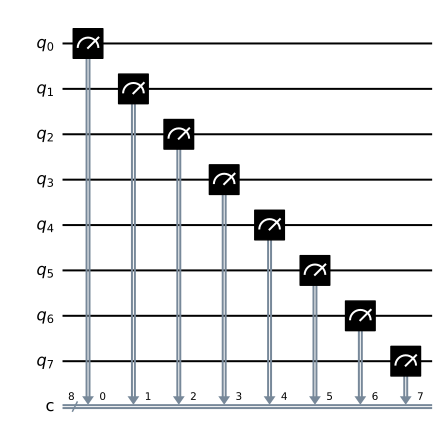

In [10]:
qc_output.draw()

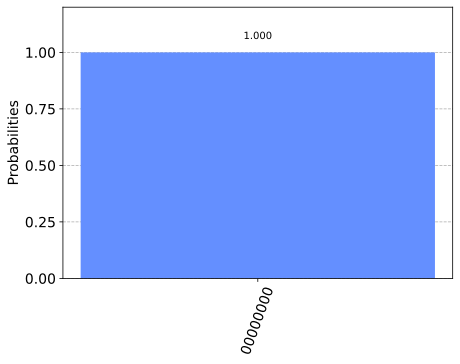

In [11]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

* Now change the input string with the X (NOT) port

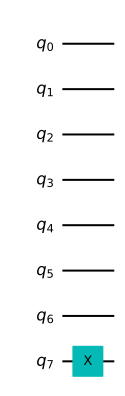

In [12]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

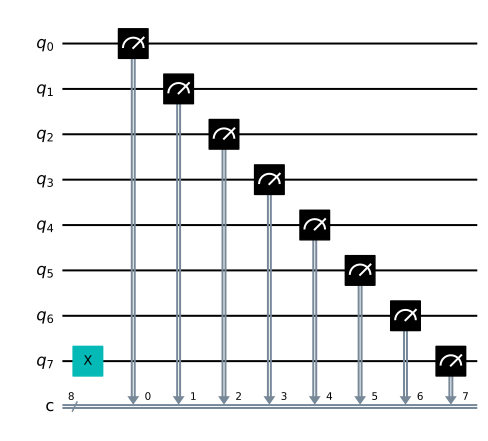

In [13]:
qc = qc_encode + qc_output
qc.draw()

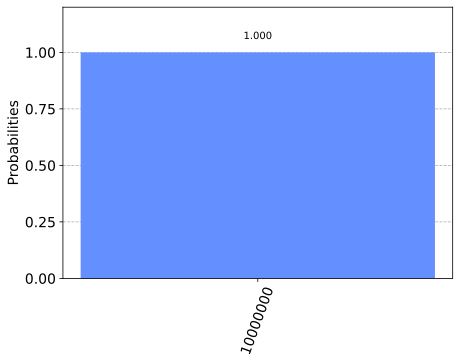

In [14]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

* Now let's implement an *half adder*

* This is the basis: with a set of half adders you can create any complex CPU

* We'll use a CNOT (CX) as a XOR port and a *Toffoli* (CCX) port as an AND

    * Toffoli is a port like CNOT but with 2 controller qubits
    
    * So if A && B => C = !C

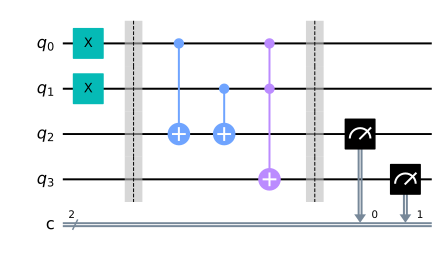

In [18]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

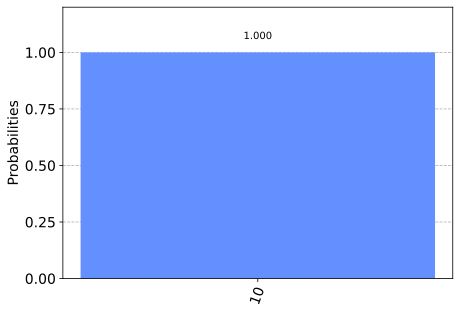

In [19]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

* q2 = q0 XOR q1

* q3 = q0 AND q1

* |q3 q2> = |0 q0> + |0 q1>